
# Project: Wrangling and Analyze Data

In [1]:
#Load libraries
import tweepy
import requests
from tweepy import OAuthHandler
import os
import json
from timeit import default_timer as timer
import random
import sys
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
my_download = requests.get(url)
my_download

<Response [200]>

In [5]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(my_download.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
CONSUMER_KEY = 'YOUR CONSUMER KEY'
CONSUMER_SECRET = 'YOUR CONSUMER SECRET'
OAUTH_TOKEN = 'YOUR ACCESS TOKEN'
OAUTH_TOKEN_SECRET = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [8]:
#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

In [8]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)


2356

In [9]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [11]:
# Save each tweet's returned JSON as a new line in a .txt file
#THE Extraction didnt work. Ignore the code
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below

In [10]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print out one json object for further reference 
tweets[0] 

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [11]:
# Defining the properties that are needed.
vital_properties = ['id', 'favorite_count', 'retweet_count']

In [12]:
#Create an empty list to
# Make use of the Dictionary
archived_tweets = []
with open('tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in vital_properties)
        archived_tweets.append(data_row)
        json_tweet = r.readline()

In [13]:
# create DataFrame    
df_tweets = pd.DataFrame.from_dict(archived_tweets)

In [14]:
df_tweets.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



**2.1 Assessing the archive**

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Observation
<li>The Columns doggo, floofer, pupper and puppo all represent one single variable.</li>
<li>The source contains html residues.</li>

In [16]:
twitter_archive.shape

(2356, 17)

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Observation
timestamp column is a string rather than a datetime

In [18]:

# take a data frame column and a column name and print the number of 'None' string in the column
def none_find(column,name):
    
    count=0
    for word in column:
        if word == 'None':
            count+=1
    print('Name of the column is: ', name, ' and has ',count,' number of None.')

In [19]:
none_find(twitter_archive['tweet_id'],'tweet_id')
none_find(twitter_archive['timestamp'],'timestamp')
none_find(twitter_archive['source'],'source')
none_find(twitter_archive['expanded_urls'],'expanded_urls')
none_find(twitter_archive['rating_numerator'],'rating_numerator')
none_find(twitter_archive['rating_denominator'],'rating_denominator')
none_find(twitter_archive['name'],'name')
none_find(twitter_archive['doggo'],'doggo')
none_find(twitter_archive['floofer'],'floofer')
none_find(twitter_archive['pupper'],'pupper')
none_find(twitter_archive['puppo'],'puppo')

Name of the column is:  tweet_id  and has  0  number of None.
Name of the column is:  timestamp  and has  0  number of None.
Name of the column is:  source  and has  0  number of None.
Name of the column is:  expanded_urls  and has  0  number of None.
Name of the column is:  rating_numerator  and has  0  number of None.
Name of the column is:  rating_denominator  and has  0  number of None.
Name of the column is:  name  and has  745  number of None.
Name of the column is:  doggo  and has  2259  number of None.
Name of the column is:  floofer  and has  2346  number of None.
Name of the column is:  pupper  and has  2099  number of None.
Name of the column is:  puppo  and has  2326  number of None.


### Observation
<li>The "name" column has a total of 745  'None' strings present</li>
<li>The "doggo" column has a total of  2259 'None' strings present</li>
<li>The "floofer" column has a total of 2346 'None' strings present</li>
<li>The "pupper" column has a total of 2099 'None' strings present</li>
<li>The "puppo" column has a total of2326 'None' strings present</li>

In [20]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [21]:
# take a data frame column and a column name and print the number of stop words in the column
def the_stopwords(column,name):
    count=0
    for word in column:
        if word in ENGLISH_STOP_WORDS:
            count+=1
    print('Name of the column is: ',name,'  and has ',count,' stop words.')

In [22]:
the_stopwords(twitter_archive['tweet_id'],'tweet_id')
the_stopwords(twitter_archive['timestamp'],'timestamp')
the_stopwords(twitter_archive['source'],'source')
the_stopwords(twitter_archive['expanded_urls'],'expanded_urls')
the_stopwords(twitter_archive['rating_numerator'],'rating_numerator')
the_stopwords(twitter_archive['rating_denominator'],'rating_denominator')
the_stopwords(twitter_archive['name'],'name')
the_stopwords(twitter_archive['doggo'],'doggo')
the_stopwords(twitter_archive['floofer'],'floofer')
the_stopwords(twitter_archive['pupper'],'pupper')
the_stopwords(twitter_archive['puppo'],'puppo')

Name of the column is:  tweet_id   and has  0  stop words.
Name of the column is:  timestamp   and has  0  stop words.
Name of the column is:  source   and has  0  stop words.
Name of the column is:  expanded_urls   and has  0  stop words.
Name of the column is:  rating_numerator   and has  0  stop words.
Name of the column is:  rating_denominator   and has  0  stop words.
Name of the column is:  name   and has  87  stop words.
Name of the column is:  doggo   and has  0  stop words.
Name of the column is:  floofer   and has  0  stop words.
Name of the column is:  pupper   and has  0  stop words.
Name of the column is:  puppo   and has  0  stop words.


### Observation
<li>The "name" column has a total of 87 stop words present</li>

In [25]:
twitter_archive.expanded_urls.sample(5)

986     https://twitter.com/dog_rates/status/749064354...
86      https://twitter.com/dog_rates/status/875747767...
752     https://twitter.com/dog_rates/status/778990705...
1644    https://twitter.com/dog_rates/status/683852578...
941                         https://vine.co/v/OEppMFbejFz
Name: expanded_urls, dtype: object

In [23]:
twitter_archive.expanded_urls[986]

'https://twitter.com/dog_rates/status/749064354620928000/photo/1,https://twitter.com/dog_rates/status/749064354620928000/photo/1'

### Observation 
 we notice a Double-Link in "expanded_urls" column data content

In [24]:
#Count the number of entries with double urls
twitter_archive.expanded_urls.str.contains(r',').sum()

639

### Observation 
 The total counts of double url is 639

In [86]:
twitter_archive.rating_denominator.sample(5)  

2283    10
2059    10
1288    10
433     70
1188    10
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive.rating_denominator[433]

70

In [26]:
#find the no. of denominator not equal to 10
num_of_denom = 0
for i in twitter_archive['rating_denominator']:
    if i != 10 :
        num_of_denom += 1
        
print('The count of Denominator not equal to 10 is {}.'.format(num_of_denom))

The count of Denominator not equal to 10 is 23.


### Observation 
Some denomenators are not equal to 10 and they are 23 in number

In [29]:
twitter_archive.rating_numerator.sample(5)

596     10
1080    13
841     10
1400    12
410     11
Name: rating_numerator, dtype: int64

In [27]:
# Find the number of values for which the Numerator is less than 10 

num_of_numerator = 0
for num in twitter_archive['rating_numerator']:
    if num <= 9:
        num_of_numerator += 1
        
# Output the Count         
print('The count of Numerator values less than 10 is {}.'.format(num_of_numerator))

The count of Numerator values less than 10 is 440.


### Observation
There exist some numerators less than 10 and they are 440 in number.

## 2.2 Assessing image

In [28]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Observation
We can observe that the columns "p1", "p2" and "p3" contradict each other.

In [29]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Observations
Column Names are not decriptive enough

In [30]:
image_prediction.duplicated().sum()

0

In [31]:
# Getting the count of image

image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
# take a data frame column and a column name and print the number of 'None' string in the column
none_find(image_prediction['tweet_id'],'tweet_id')
none_find(image_prediction['jpg_url'],'jpg_url')
none_find(image_prediction['img_num'],'img_num')
none_find(image_prediction['p1'],'p1')
none_find(image_prediction['p1_conf'],'p1_conf')
none_find(image_prediction['p2'],'p2')
none_find(image_prediction['p2_conf'],'p2_conf')
none_find(image_prediction['p3'],'p3')
none_find(image_prediction['p3_conf'],'p3_conf')
none_find(image_prediction['p1_dog'],'p1_dog')
none_find(image_prediction['p2_dog'],'p2_dog')
none_find(image_prediction['p3_dog'],'p3_dog')

Name of the column is:  tweet_id  and has  0  number of None.
Name of the column is:  jpg_url  and has  0  number of None.
Name of the column is:  img_num  and has  0  number of None.
Name of the column is:  p1  and has  0  number of None.
Name of the column is:  p1_conf  and has  0  number of None.
Name of the column is:  p2  and has  0  number of None.
Name of the column is:  p2_conf  and has  0  number of None.
Name of the column is:  p3  and has  0  number of None.
Name of the column is:  p3_conf  and has  0  number of None.
Name of the column is:  p1_dog  and has  0  number of None.
Name of the column is:  p2_dog  and has  0  number of None.
Name of the column is:  p3_dog  and has  0  number of None.


In [33]:
#take a data frame column and a column name and print the number of stop words in the column
the_stopwords(image_prediction['tweet_id'],'tweet_id')
the_stopwords(image_prediction['jpg_url'],'jpg_url')
the_stopwords(image_prediction['img_num'],'img_num')
the_stopwords(image_prediction['p1'],'p1')
the_stopwords(image_prediction['p1_conf'],'p1_conf')
the_stopwords(image_prediction['p2'],'p2')
the_stopwords(image_prediction['p2_conf'],'p2_conf')
the_stopwords(image_prediction['p3'],'p3')
the_stopwords(image_prediction['p3_conf'],'p3_conf')
the_stopwords(image_prediction['p1_dog'],'p1_dog')
the_stopwords(image_prediction['p2_dog'],'p2_dog')
the_stopwords(image_prediction['p3_dog'],'p3_dog')

Name of the column is:  tweet_id   and has  0  stop words.
Name of the column is:  jpg_url   and has  0  stop words.
Name of the column is:  img_num   and has  0  stop words.
Name of the column is:  p1   and has  0  stop words.
Name of the column is:  p1_conf   and has  0  stop words.
Name of the column is:  p2   and has  0  stop words.
Name of the column is:  p2_conf   and has  0  stop words.
Name of the column is:  p3   and has  0  stop words.
Name of the column is:  p3_conf   and has  0  stop words.
Name of the column is:  p1_dog   and has  0  stop words.
Name of the column is:  p2_dog   and has  0  stop words.
Name of the column is:  p3_dog   and has  0  stop words.


## 2.3 Assessing data from Twitter API

In [34]:
df_tweets

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [35]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
df_tweets.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [37]:
df_tweets.shape

(2354, 3)

In [38]:
df_tweets.duplicated().sum()

0

## 2.4 Assessing conclusion

<h4>Archives</h4>
<h5>Quality issues</h5>
<ol>
<li>Timestamp column is a string. Needs to be changed to datetime</li>
<li>The source contains html residues.</li>
<li>We can observe that there are some 'None' objects present in"doggo", "floofer", "pupper" and "puppo" which have to be convert into 'NaN'.</li>
<li>The "name" column has a total of 745 'None' strings present.</li>
<li>The "name" column has a total of 87 stop words present</li>
<li>639 double links are present within "expanded_urls" column data</li>
<li>There are values not rated out of 10 as seen in the 'rating_denominator'. They are 23 in number</li>

<li>The rows need to be suppressed if the value is a non-null to conserve only original tweets for the coulumn data corresponding to  : "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_statud_timestamp".</li>
</ol>

<h5>Tidiness issues</h5>
<ol>
<li>The variables doggo, floofer, pupper and puppo present in the data as depicted above, all represent one single variable and should be part of one single column</li>
<li>twitter_archives and df_tweets(the API data) form one observational unit</li>
</ol>


<h4>Image</h4>
<h5>Quality issues</h5>
<ol>
<li>We can observe that the columns "p1", "p2" and "p3" possess inconsistent Cases</li>
</ol>


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Creating copies of the Dataframes for Cleaning

clean_archives = twitter_archive.copy()
clean_images= image_prediction.copy()
clean_tweets= df_tweets.copy()

### 3.1 Archives

### Issue #1: Double-Links error


<h5>Define</h5>
Resolving the Double-Links error and generating URLs when missing

<h5>Code</h5>

In [40]:
for my_urls in range(len(clean_archives)):
    id_tweet = clean_archives['tweet_id'][my_urls]
    url = 'https://twitter.com/dog_rates/status/{}'.format(id_tweet)
    clean_archives['expanded_urls'].replace(clean_archives['expanded_urls'][my_urls],url,inplace=True)

<h5>Test</h5>

In [41]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2356 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [42]:
print(clean_archives.expanded_urls[1261])

https://twitter.com/dog_rates/status/710153181850935296


### Issue #2: Html elements in source

<h5>Define</h5>
Remove Html elements from source

<h5>Code</h5>

In [43]:
#Group them in a list of categories 
source_with_html = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
            ]

# List without html
my_source = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [44]:
[clean_archives.source.replace(source_with_html, my_source, inplace=True) for current_source, new_source in zip(source_with_html, my_source)];

<h5>Test</h5>

In [45]:
print(clean_archives.source.sample(5))
print(clean_archives.source.head(2))

968     Twitter for iPhone
2013    Twitter for iPhone
486     Twitter for iPhone
251     Twitter for iPhone
1812    Twitter for iPhone
Name: source, dtype: object
0    Twitter for iPhone
1    Twitter for iPhone
Name: source, dtype: object


### Issue #3:Rows with re-tweet and unnecessary columns

<h5>Define</h5>
Removing the rows with re-tweet and unnecessary columns

<h5>Code</h5>

In [46]:
# Dropping the unnecessary rows
clean_archives = clean_archives[clean_archives['in_reply_to_status_id'].isnull()]
clean_archives = clean_archives[clean_archives['retweeted_status_id'].isnull()]

In [47]:
# Dropping the unnecessary columns

clean_archives.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                    'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

<h5>Test</h5>

In [48]:
clean_archives.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:+0000 in timestamp and the object as timestamp datatype

<h5>Define</h5>
 Remove +0000 from timestamp  and Changing the Data-type of timestamp to datetime

<h5>Code</h5>

In [49]:
clean_archives.timestamp = clean_archives.timestamp.str[:-5].str.strip()

In [50]:
clean_archives['timestamp'] = pd.to_datetime(clean_archives['timestamp'])

<h5>Test</h5>

In [51]:
clean_archives.timestamp.sample(3)

1692   2015-12-28 02:35:15
1465   2016-02-02 02:53:12
1451   2016-02-06 02:22:53
Name: timestamp, dtype: datetime64[ns]

In [52]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2097 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #5:'Stop-Words' in "name" column

<h5>Define</h5>
Get rid of the 'Stop-Words' in "name" column

<h5>Code</h5>

In [53]:
for problems in clean_archives['name']:
    if problems in ENGLISH_STOP_WORDS:
        clean_archives['name']=clean_archives['name'].where(clean_archives['name']!=problems, np.NaN)

<h5>Test</h5>

In [54]:
the_stopwords(clean_archives['name'],'name')

Name of the column is:  name   and has  0  stop words.


### Issue #6:Lowcase names in variable name

<h5>Define</h5>
Convert lowcase names in variable name to Title


<h5>Code</h5>

In [55]:
clean_archives.name =clean_archives.name.str.title()

<h5>Test</h5>

In [56]:
clean_archives.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352         NaN
2353         NaN
2354         NaN
2355        None
Name: name, Length: 2097, dtype: object

### Issue #7:Presence of 'None' in various columns

<h5>Define</h5>
Replacing 'None' string with 'NaN'

<h5>Code</h5>

In [57]:
clean_archives['name'] = clean_archives['name'].where(clean_archives['name'] != problems, np.NaN) 
clean_archives['doggo'] = clean_archives['doggo'].where(clean_archives['doggo'] != problems, np.NaN) 
clean_archives['floofer'] = clean_archives['floofer'].where(clean_archives['floofer'] != problems, np.NaN) 
clean_archives['pupper'] = clean_archives['pupper'].where(clean_archives['pupper'] != problems, np.NaN) 
clean_archives['puppo'] = clean_archives['puppo'].where(clean_archives['puppo'] != problems, np.NaN) 


<h5>Test</h5>

In [58]:
none_find(clean_archives['name'],'name')
none_find(clean_archives['doggo'],'doggo')
none_find(clean_archives['floofer'],'floofer')
none_find(clean_archives['pupper'],'pupper')
none_find(clean_archives['puppo'],'puppo')

Name of the column is:  name  and has  0  number of None.
Name of the column is:  doggo  and has  0  number of None.
Name of the column is:  floofer  and has  0  number of None.
Name of the column is:  pupper  and has  0  number of None.
Name of the column is:  puppo  and has  0  number of None.


### Issue #7: Numerator and Denominator Values

<h5>Define:Handling  the Numerator and Denominator Values with issues</h5>

<h5>Code</h5>

In [59]:
clean_archives.rating_denominator.sample(5)

499     10
62      10
2182    10
2276    10
41      10
Name: rating_denominator, dtype: int64

In [60]:
numerator_issue = clean_archives.loc[clean_archives['rating_denominator']!=10]

# Looking up the numerator with issues
for i in numerator_issue['text']:
    if '/10' in i:
        print(i)
        print(numerator_issue[numerator_issue['text']==i].index)


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Int64Index([1068], dtype='int64')
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
Int64Index([1165], dtype='int64')
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Int64Index([1202], dtype='int64')
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Int64Index([1662], dtype='int64')
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Int64Index([2335], dtype='int64')


In [61]:
# Manual replacement of data 
clean_archives.loc[clean_archives.index == 1068, 'rating_numerator'] = 14
clean_archives.loc[clean_archives.index == 1165, 'rating_numerator'] = 13
clean_archives.loc[clean_archives.index == 1202, 'rating_numerator'] = 11
clean_archives.loc[clean_archives.index == 1662, 'rating_numerator'] = 10
clean_archives.loc[clean_archives.index == 2335, 'rating_numerator'] = 9

clean_archives.loc[clean_archives.index == 1068, 'rating_denominator'] = 10
clean_archives.loc[clean_archives.index == 1165, 'rating_denominator'] = 10
clean_archives.loc[clean_archives.index == 1202, 'rating_denominator'] = 10
clean_archives.loc[clean_archives.index == 1662, 'rating_denominator'] = 10
clean_archives.loc[clean_archives.index == 2335, 'rating_denominator'] = 10

In [62]:
#Handling numerator with decimals
import re

In [63]:
original = twitter_archive.copy()
original.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [64]:

for issues in original['text']:
    detect = '(\d+\.\d+)\/(\d+)'
    srch = re.search(detect,issues)
    if srch != None:
        Ind=original.loc[original['text']==issues].index[0]
        Txt = twitter_archive.text[Ind]
        Num = twitter_archive.rating_numerator[Ind]
        print(  'Index is : ',Ind,'\n',
                'Text is : ',Txt,'\n'
                'The Numerator is : ',Num,'\n',
            )

Index is :  45 
 Text is :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 
The Numerator is :  5 

Index is :  340 
 Text is :  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 
The Numerator is :  75 

Index is :  695 
 Text is :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 
The Numerator is :  75 

Index is :  763 
 Text is :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 
The Numerator is :  27 

Index is :  1689 
 Text is :  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 
The Numerator is :  5 

Index is :  1712 
 Text is :  Here we have uncovere

In [65]:
clean_archives.loc[clean_archives.index == 45, 'rating_numerator'] = 13.5
clean_archives.loc[clean_archives.index == 340, 'rating_numerator'] = 9.75
clean_archives.loc[clean_archives.index == 695, 'rating_numerator'] = 9.75
clean_archives.loc[clean_archives.index == 763, 'rating_numerator'] = 11.27
clean_archives.loc[clean_archives.index == 1689, 'rating_numerator'] = 9.5
clean_archives.loc[clean_archives.index == 1712, 'rating_numerator'] = 11.26

<h5>Test<h5>

In [66]:
print(  clean_archives.rating_numerator[1068],
        clean_archives.rating_numerator[1165],
        clean_archives.rating_numerator[1202],
        clean_archives.rating_numerator[1662],
        clean_archives.rating_numerator[2335],
        clean_archives.rating_numerator[45],
        clean_archives.rating_numerator[695],
        clean_archives.rating_numerator[763],
        clean_archives.rating_numerator[1712]
    )

14.0 13.0 11.0 10.0 9.0 13.5 9.75 11.27 11.26


In [67]:
clean_archives.rating_numerator

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2097, dtype: float64

### Issue #8: Dog stage/slang columns

<h5>Define</h5>
Combine  floofer, doggo, pupper, puppo columns

<h5>Code</h5>

In [68]:
def combine_dogslang(colmn):
    # Defining a list to store the data
    slang_list = []
    if colmn['doggo'] == 'doggo':
        slang_list.append('doggo')
    if colmn['floofer'] == 'floofer':
        slang_list.append('floofer')
    if colmn['pupper'] == 'pupper':
        slang_list.append('pupper')
    if colmn['puppo'] == 'puppo':
        slang_list.append('puppo')
    if len(slang_list) < 1: 
        colmn['Dog_slang'] = 'None'
    else: 
        colmn['Dog_slang'] = ' and '.join(slang_list)
    return colmn

In [69]:
clean_archives = clean_archives.apply(combine_dogslang, axis=1)

In [70]:
# Discarding unwanted entries
clean_archives = clean_archives.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<h5>Test</h5>

In [71]:
clean_archives.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_slang
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None


In [72]:
clean_archives.Dog_slang.sample(5)

2337    None
819     None
2106    None
1118    None
529     None
Name: Dog_slang, dtype: object

### Issue #9:two dog slangs

<h5>Define</h5>
Remove instance where there are two dog slangs

<h5>Code</h5>

In [73]:
for dog_one, dog_two in clean_archives.iterrows():
    if ' and ' in dog_two['Dog_slang']:
        print (dog_one, dog_two['Dog_slang'],'\n','\n',
            dog_two['text'],'\n','\n')

191 doggo and puppo 
 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel 
 

200 doggo and floofer 
 
 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk 
 

460 doggo and pupper 
 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7 
 

531 doggo and pupper 
 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho 
 

575 doggo and pupper 
 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj 
 

705 doggo and pupper 
 
 This is Pinot. He's a sophisticated doggo. You can 

In [74]:
#pick the first slang and populate it 
clean_archives.loc[clean_archives.index == 191, 'Dog_slang'] = 'puppo'
clean_archives.loc[clean_archives.index == 200, 'Dog_slang'] = 'floofer'
clean_archives.loc[clean_archives.index == 460, 'Dog_slang'] = 'pupper'
clean_archives.loc[clean_archives.index == 575, 'Dog_slang'] = 'doggo'
clean_archives.loc[clean_archives.index == 705, 'Dog_slang'] = 'doggo'
clean_archives.loc[clean_archives.index == 956, 'Dog_slang'] = np.NaN

In [75]:
clean_archives['Dog_slang'] = clean_archives['Dog_slang'].where(clean_archives['Dog_slang']!=problems, np.NaN) 

<h5>Test</h5>

In [76]:
clean_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2097 non-null   object        
 5   rating_numerator    2097 non-null   float64       
 6   rating_denominator  2097 non-null   int64         
 7   name                1409 non-null   object        
 8   Dog_slang           335 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 228.4+ KB


### 3.2 Image

### Issue #1: inconsistent Cases

<h5>Define</h5>
Fix inconsistent Cases

<h5>Code</h5>

In [77]:
clean_images['p1'] = clean_images['p1'].str.title()
clean_images['p2'] = clean_images['p2'].str.title()
clean_images['p3'] = clean_images['p3'].str.title()

<h5>Test</h5>

In [78]:
clean_images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### 3.3 Merge the cleaned dataframes

### Issue #1:Separate dataframes

<h5>Define</h5>
Merge the cleaned data

<h5>Code</h5>

In [79]:
We_rate_dogs = clean_images.merge(clean_archives, left_on='tweet_id',right_on='tweet_id',how='inner')

In [80]:
We_rate_dogs = We_rate_dogs.merge(clean_tweets,left_on='tweet_id',right_on='id',how='inner')


In [81]:
# Dropping unnecessary fields
We_rate_dogs =We_rate_dogs.drop(['id'], axis=1)

<h5>Test</h5>

In [82]:
We_rate_dogs.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_slang,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,...,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,NaN,2535,532


In [83]:
We_rate_dogs.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'Dog_slang', 'favorite_count', 'retweet_count'],
      dtype='object')

In [84]:
We_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   jpg_url             1971 non-null   object        
 2   img_num             1971 non-null   int64         
 3   p1                  1971 non-null   object        
 4   p1_conf             1971 non-null   float64       
 5   p1_dog              1971 non-null   bool          
 6   p2                  1971 non-null   object        
 7   p2_conf             1971 non-null   float64       
 8   p2_dog              1971 non-null   bool          
 9   p3                  1971 non-null   object        
 10  p3_conf             1971 non-null   float64       
 11  p3_dog              1971 non-null   bool          
 12  timestamp           1971 non-null   datetime64[ns]
 13  source              1971 non-null   object      

Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
# store the master dataframe 
We_rate_dogs.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [86]:
# Copying the Data Frame
df_master =We_rate_dogs.copy() 

In [87]:
df_master.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_slang,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,...,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10,NaN,NaN,2535,532


1. The record with the maximum and minimum number of retweets.

### 4.1 Analyze and Visualize Retweets in the period of a year

 ### Insights #1.  The record with the maximum and minimum number of retweets.

In [88]:
df_master.retweet_count.describe()

count     1971.000000
mean      2784.449518
std       4697.662893
min         16.000000
25%        628.500000
50%       1367.000000
75%       3239.000000
max      79515.000000
Name: retweet_count, dtype: float64

<h5>Observation</h5>
The minimum number of retweets is 16 Retweets while the maximum is 79515

In [89]:
# Getting the record with the mininum number of retweets 
#first get its index
my_index =df_master['retweet_count'].idxmin()
print('The index is:', my_index)


The index is: 16


In [90]:
#Display the record
print(df_master.iloc[16])

tweet_id                                             666102155909144576
jpg_url                 https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
img_num                                                               1
p1                                                       English_Setter
p1_conf                                                        0.298617
p1_dog                                                             True
p2                                                         Newfoundland
p2_conf                                                        0.149842
p2_dog                                                             True
p3                                                               Borzoi
p3_conf                                                        0.133649
p3_dog                                                             True
timestamp                                           2015-11-16 03:55:04
source                                               Twitter for

In [91]:
# Getting the record with the maximum number of retweets 
#first get its index
my_index =df_master['retweet_count'].idxmax()
print('The index is:', my_index)


The index is: 1201


In [92]:
#Display the record
print(df_master.iloc[1201])

tweet_id                                             744234799360020481
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                               1
p1                                                   Labrador_Retriever
p1_conf                                                        0.825333
p1_dog                                                             True
p2                                                             Ice_Bear
p2_conf                                                        0.044681
p2_dog                                                            False
p3                                                              Whippet
p3_conf                                                        0.018442
p3_dog                                                             True
timestamp                                           2016-06-18 18:26:18
source                                               Twitter for

 ### Insights #2. Months with the highest tweet interactions

<h5>Visualization</h5>

In [93]:
import matplotlib.dates as mdates

Text(0, 0.5, 'Number of Retweets')

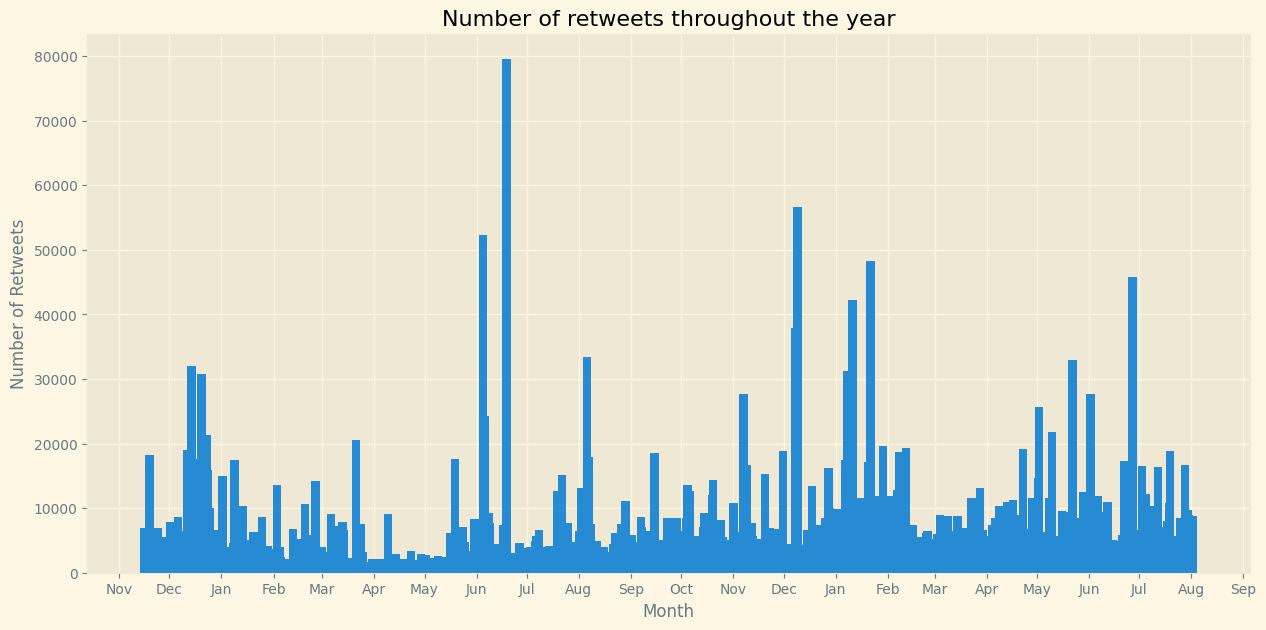

In [94]:
df_plot=df_master.copy()

# Setting up the date as index
df_plot.set_index('timestamp',inplace=True)

# Setting up the plot style.
plt.style.use('Solarize_Light2')

# Plotting the data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_plot.index, df_plot['retweet_count'],width=5)


# Setting up the ticks for each week
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Setting the format for major ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Setting up the axis and graph titles
ax.set_title('Number of retweets throughout the year')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Retweets')

# # Generating the figure
# fig.savefig('retweets_through_time.png')

observation: The Month of June had the highest number of tweet engagements ie Retweets.

### 4.2 Analyze and visualize Source

### Insight #3: The most prominent source (app).

In [95]:
df_master.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Visualization

Text(0.5, 1.0, 'Most used platform/Tweet source')

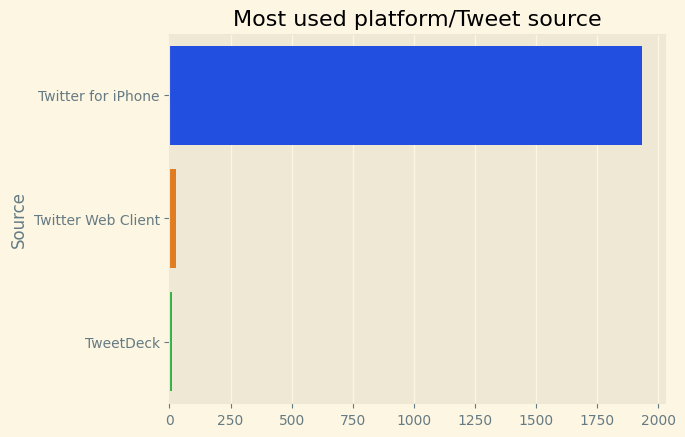

In [96]:
x=df_master.source.value_counts().index
y=df_master.source.value_counts().values

my_style = sns.color_palette("bright")

sns.barplot(x=y,y=x,palette=my_style)
plt.ylabel('Source')
plt.title('Most used platform/Tweet source')

Observation: IPhone Was the most used source for tweeting. Followed by a distant far which is the web browser

### 4.3 Analyze and visualize The breed of dogs in the data

### Insight #4: The most prominent dog breeds

In [105]:
# Generating a copy of the dataframe
dog_breeds = df_master.copy()
# Fetching the count of unique breeds
print('The tweeted dog breeds are : ', dog_breeds['p1'].nunique())

The tweeted dog breeds are :  373


In [107]:
# Calculating the frequency of various breeds
df_master['p1'].value_counts()

Golden_Retriever      137
Labrador_Retriever     94
Pembroke               88
Chihuahua              78
Pug                    54
                     ... 
Mailbox                 1
Entlebucher             1
Earthstar               1
Pillow                  1
Orange                  1
Name: p1, Length: 373, dtype: int64

In [97]:

frequency = df_master['p1'].value_counts().to_dict()
breed_of_dogs = pd.DataFrame(list(frequency.items()), columns=['breed', 'frequency'])

# Filtering the Data for frequencies > 23 only
breed_of_dogs.drop(breed_of_dogs[breed_of_dogs.frequency < 23].index, inplace=True)

The tweeted dog breeds are :  373


In [98]:
# Create a new field "total_retweet"
total_retweet =[]
for i in breed_of_dogs['breed']:
    collect = df_master[df_master['p1'] == i]['retweet_count'].sum()
    total_retweet.append(collect)

breed_of_dogs['total_retweet']=total_retweet
breed_of_dogs.head()

,breed,frequency,total_retweet
0,Golden_Retriever,137,501225
1,Labrador_Retriever,94,365109
2,Pembroke,88,280367
3,Chihuahua,78,219610
4,Pug,54,99182


Visualization

Text(0.5, 1.0, 'Most tweeted dog breed')

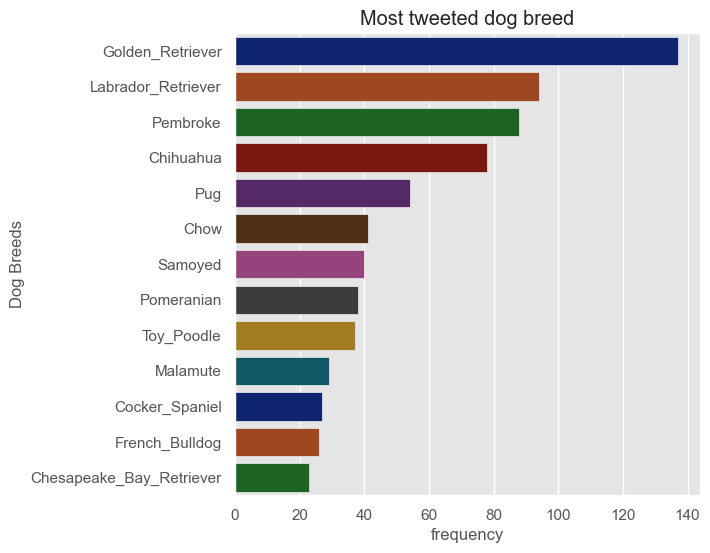

In [114]:
#Most tweeted dog breed.
x=breed_of_dogs.breed.value_counts().index
y=breed_of_dogs.frequency

my_style = sns.color_palette("dark")
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x=y, y=x, palette=my_style,ax=ax)
plt.ylabel('Dog Breeds')
plt.title('Most tweeted dog breed')

Text(0.5, 1.0, "Dog breed's tweet engagement")

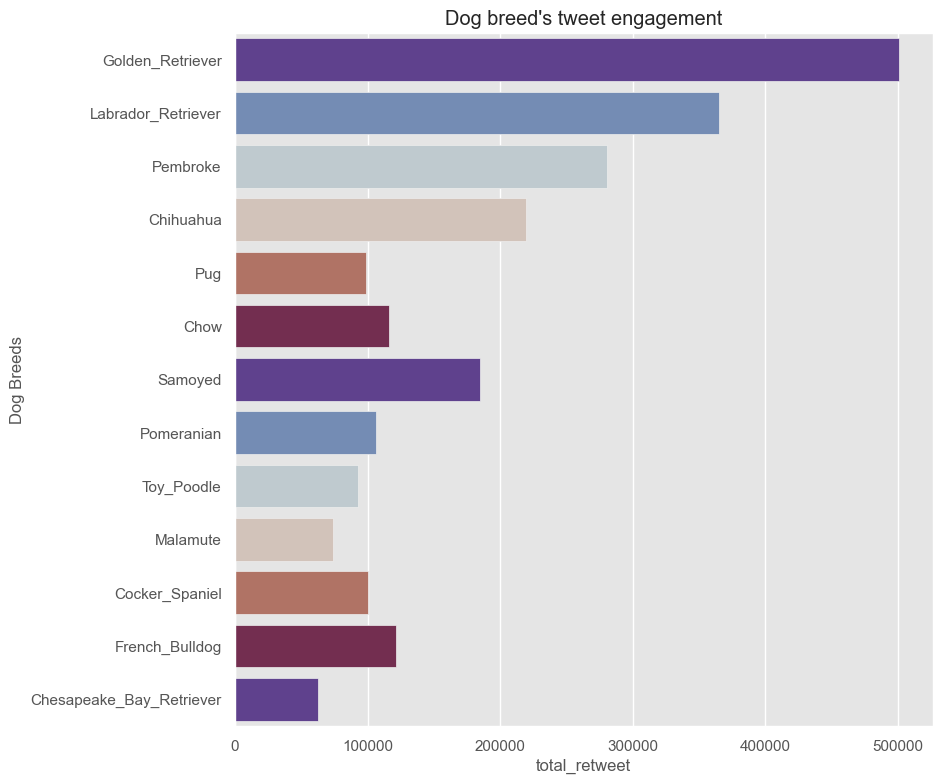

In [117]:
#Most tweeted dog breed.
x=breed_of_dogs.breed.value_counts().index
y=breed_of_dogs.total_retweet

my_style = sns.color_palette("twilight_shifted")
fig, ax = plt.subplots(figsize=(9, 9))

sns.barplot(x=y, y=x, palette=my_style,ax=ax)
plt.ylabel('Dog Breeds')
plt.title("Retweet against dog breed")

Observation : Golden retriever was the most retweeted breed of dogs

In [118]:
# Generating a new field "retweet_mean"
breed_of_dogs['retweet_mean']=breed_of_dogs['total_retweet']//breed_of_dogs['frequency']
breed_of_dogs

,breed,frequency,total_retweet,retweet_mean
0,Golden_Retriever,137,501225,3658
1,Labrador_Retriever,94,365109,3884
2,Pembroke,88,280367,3185
3,Chihuahua,78,219610,2815
4,Pug,54,99182,1836
5,Chow,41,116361,2838
6,Samoyed,40,184922,4623
7,Pomeranian,38,106518,2803
8,Toy_Poodle,37,93010,2513
9,Malamute,29,73819,2545


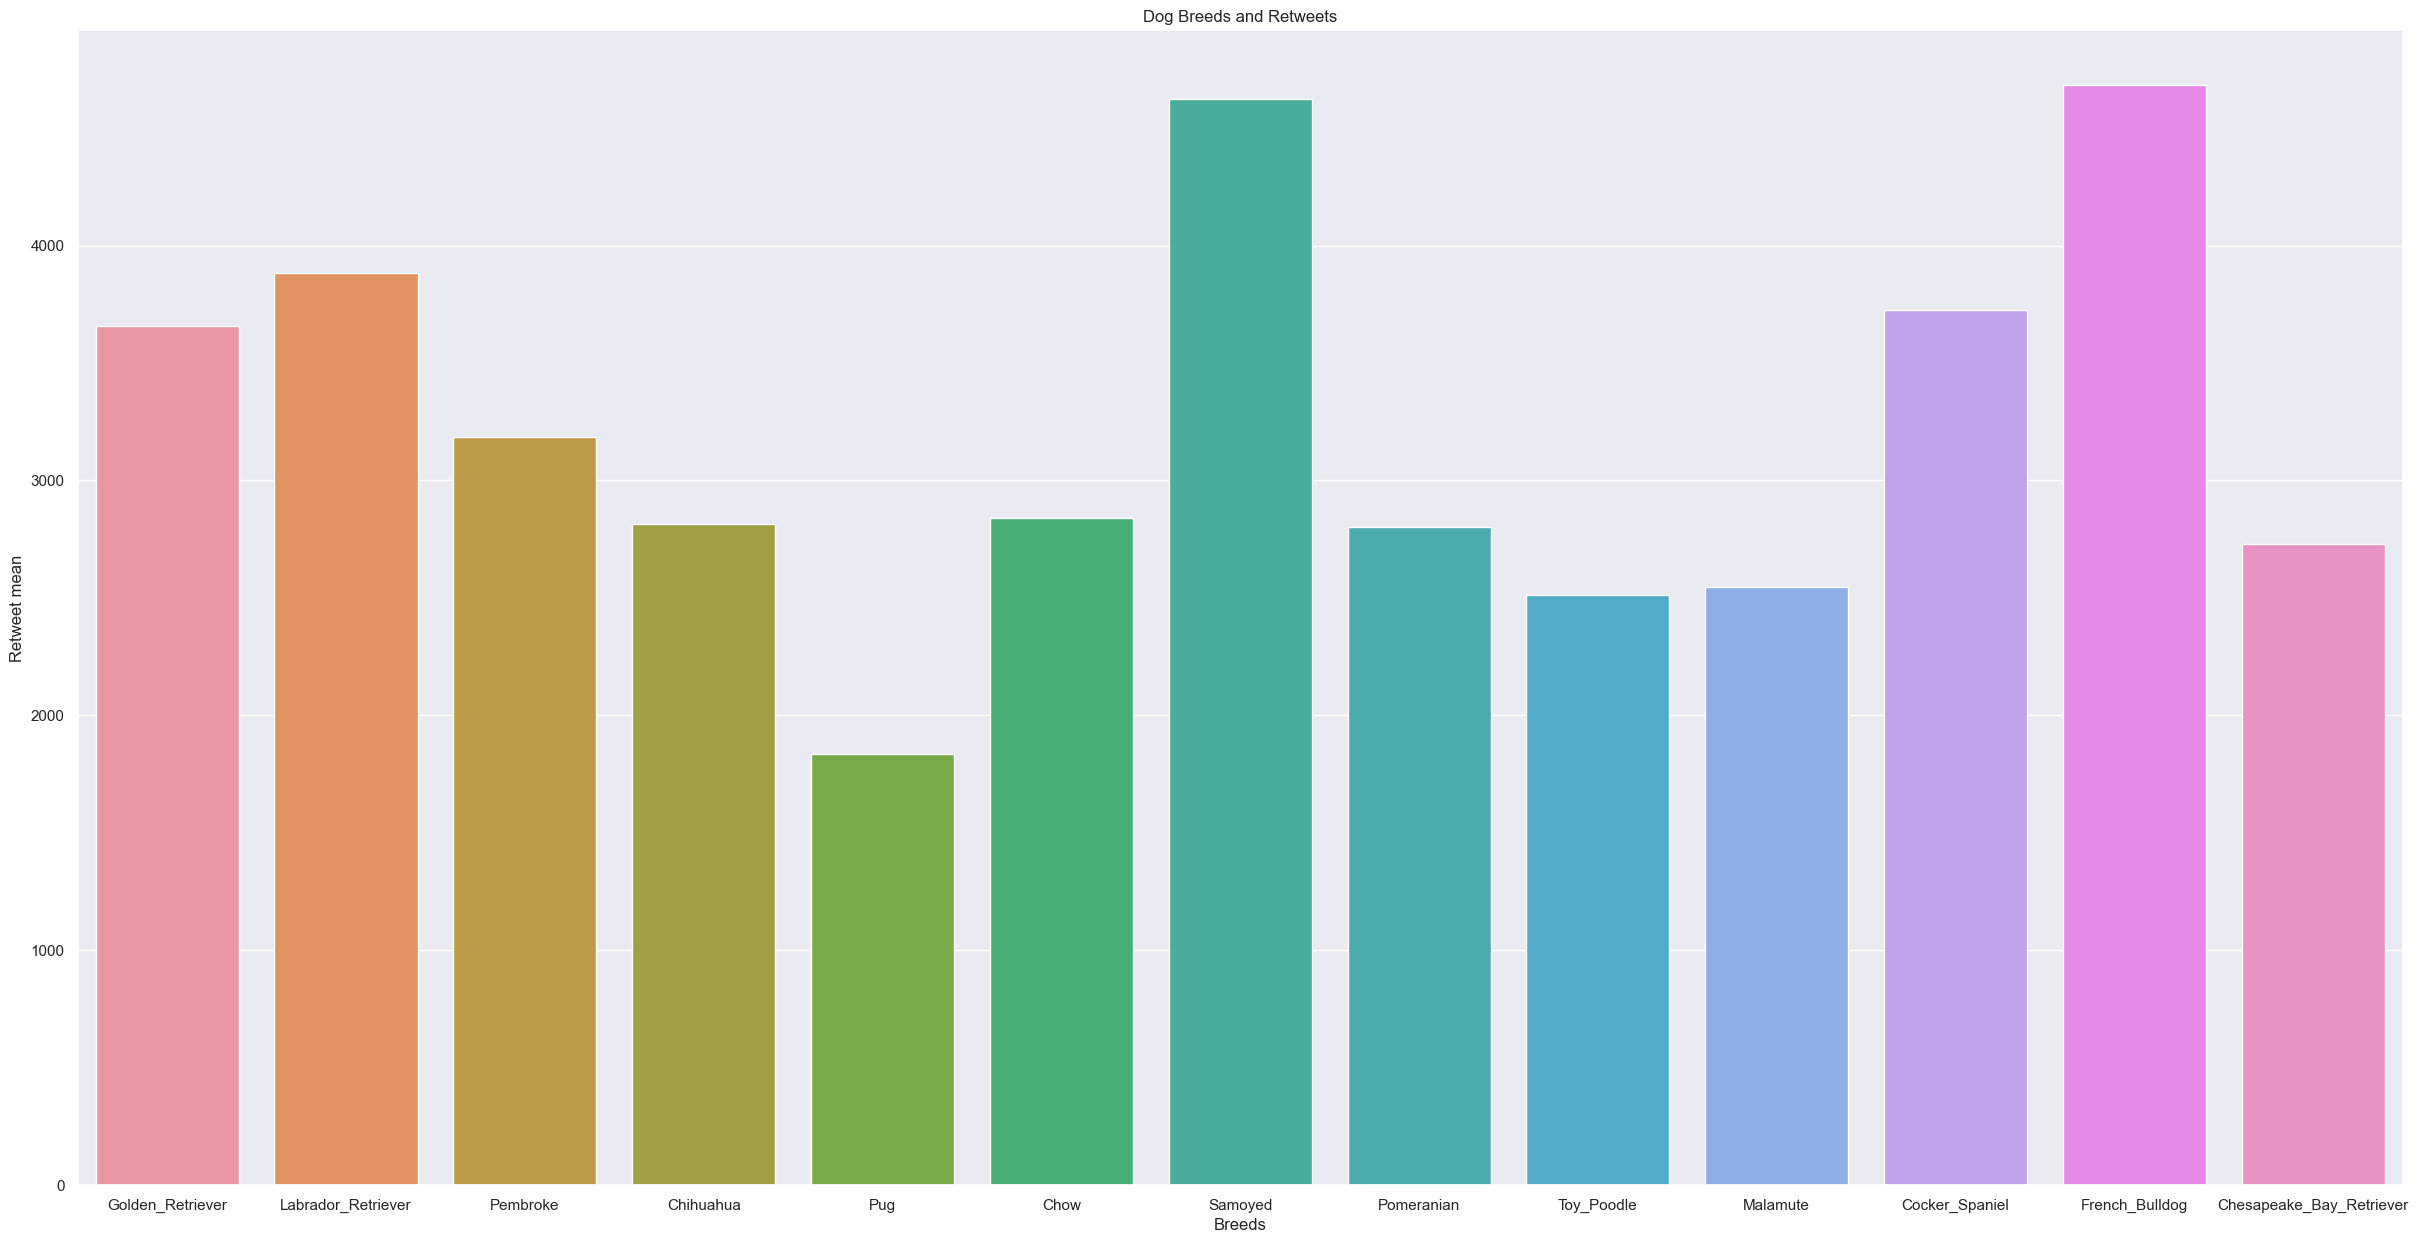

In [100]:
# Generating a graphical plot for the data
sns.set(rc={'figure.figsize':(30,15)})

# Setting up the graph layout and design
sns.set_style("darkgrid")
g = sns.barplot(x="breed", y="retweet_mean", data=breed_of_dogs)
g.set_ylabel('Retweet mean')

# Setting the appropriate headers
plt.title('Dog Breeds and Retweets')
plt.xlabel('Breeds')

# Exporting the figure
fig =g.get_figure()

Observation: Samoyed	had the most mean number of retweets.

### 4.4 Analyze and Visualize dog slangs

### Insight #5: The most prominent dog stages/slang

Visualization

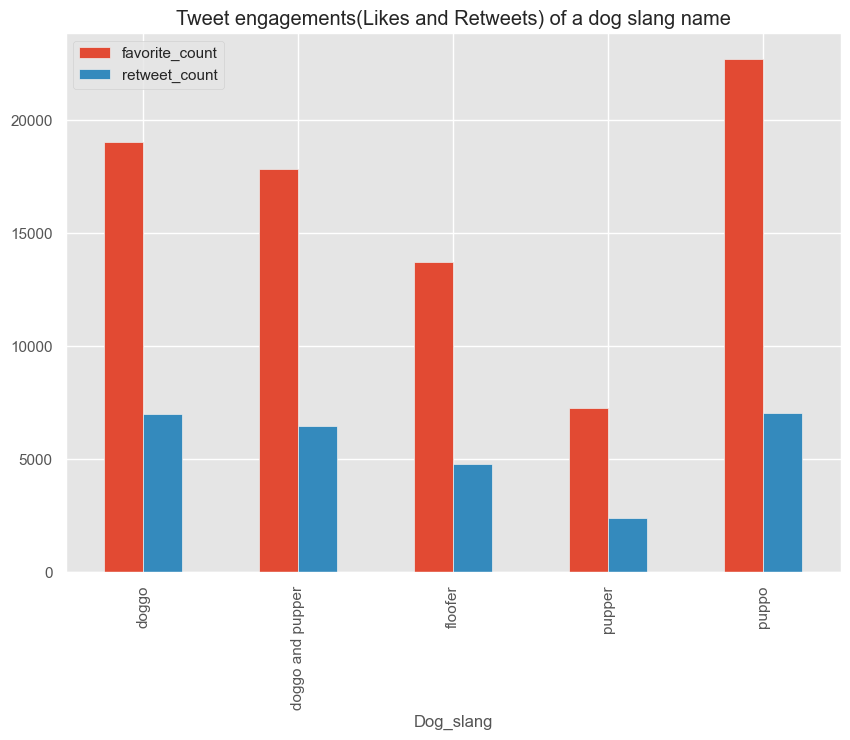

In [127]:
df_myplot = df_master.groupby('Dog_slang')[['favorite_count', 'retweet_count']]
plt.style.use('ggplot')
df_myplot.mean().plot(kind='bar', figsize=(10,7))


plt.title('Tweet engagements(Likes and Retweets) of a dog slang name')
plt.legend()
plt.show()

 Observation: A tweet with puppo as the slang had the both the most tweet engagements(highest likes and retweets)